# Molecular Classification of Cancer by Gene Expression Monitoring

## Comparision of various classifiers

In [4]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.core import datetools
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import roc_curve
import statsmodels.api as sm
from sklearn import preprocessing

from keras import layers, models, optimizers
from sklearn.tree import ExtraTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.metrics import precision_recall_curve
from scipy import stats
from statsmodels.stats import weightstats

ImportError: cannot import name np_utils

In [10]:
#labels are contained in actual.csv
#training in _training.csv
#test in _test.csv

labels_path="actual.csv"
train_path="data_set_ALL_AML_train.csv"
test_path="data_set_ALL_AML_independent.csv"

labels_df=pd.read_csv(labels_path,index_col="patient")
test_df=pd.read_csv(test_path)
train_df=pd.read_csv(train_path)

train_df.head()

,Gene Description,Gene Accession Number,1,call,2,call.1,3,call.2,4,call.3,...,29,call.33,30,call.34,31,call.35,32,call.36,33,call.37
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,A,-139,A,-76,A,-135,A,...,15,A,-318,A,-32,A,-124,A,-135,A
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,A,-73,A,-49,A,-114,A,...,-114,A,-192,A,-49,A,-79,A,-186,A
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,A,-1,A,-307,A,265,A,...,2,A,-95,A,49,A,-37,A,-70,A
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,A,283,A,309,A,12,A,...,193,A,312,A,230,P,330,A,337,A
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,A,-264,A,-376,A,-419,A,...,-51,A,-139,A,-367,A,-188,A,-407,A


In [11]:
# Translate label types from strings to respective int values for ml processing.
dic = {'ALL':0,'AML':1}
labels_df.replace(dic,inplace=True)

#Removing "call" columns from training a test dataframes
ds=[col for col in test_df.columns if 'call' in col]
test_df.drop(ds,axis=1,inplace=True)

ds=[col for col in train_df.columns if 'call' in col]
train_df.drop(ds,axis=1,inplace=True)

train_df.head()

,Gene Description,Gene Accession Number,1,2,3,4,5,6,7,8,...,35,36,37,38,28,29,30,31,32,33
0,AFFX-BioB-5_at (endogenous control),AFFX-BioB-5_at,-214,-139,-76,-135,-106,-138,-72,-413,...,7,-213,-25,-72,-4,15,-318,-32,-124,-135
1,AFFX-BioB-M_at (endogenous control),AFFX-BioB-M_at,-153,-73,-49,-114,-125,-85,-144,-260,...,-100,-252,-20,-139,-116,-114,-192,-49,-79,-186
2,AFFX-BioB-3_at (endogenous control),AFFX-BioB-3_at,-58,-1,-307,265,-76,215,238,7,...,-57,136,124,-1,-125,2,-95,49,-37,-70
3,AFFX-BioC-5_at (endogenous control),AFFX-BioC-5_at,88,283,309,12,168,71,55,-2,...,132,318,325,392,241,193,312,230,330,337
4,AFFX-BioC-3_at (endogenous control),AFFX-BioC-3_at,-295,-264,-376,-419,-230,-272,-399,-541,...,-377,-209,-396,-324,-191,-51,-139,-367,-188,-407


In [12]:
#Transpose the dataframe so that the genes become features and rows become observations
test_df=test_df.T
train_df=train_df.T
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,7119,7120,7121,7122,7123,7124,7125,7126,7127,7128
Gene Description,AFFX-BioB-5_at (endogenous control),AFFX-BioB-M_at (endogenous control),AFFX-BioB-3_at (endogenous control),AFFX-BioC-5_at (endogenous control),AFFX-BioC-3_at (endogenous control),AFFX-BioDn-5_at (endogenous control),AFFX-BioDn-3_at (endogenous control),AFFX-CreX-5_at (endogenous control),AFFX-CreX-3_at (endogenous control),AFFX-BioB-5_st (endogenous control),...,Transcription factor Stat5b (stat5b) mRNA,Breast epithelial antigen BA46 mRNA,GB DEF = Calcium/calmodulin-dependent protein ...,TUBULIN ALPHA-4 CHAIN,CYP4B1 Cytochrome P450; subfamily IVB; polypep...,PTGER3 Prostaglandin E receptor 3 (subtype EP3...,HMG2 High-mobility group (nonhistone chromosom...,RB1 Retinoblastoma 1 (including osteosarcoma),GB DEF = Glycophorin Sta (type A) exons 3 and ...,GB DEF = mRNA (clone 1A7)
Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41


In [13]:
# Clean up the column names for training and testing data
test_df.columns = test_df.iloc[1]
train_df.columns = train_df.iloc[1]

test_df = test_df.drop(['Gene Description', 'Gene Accession Number']).apply(pd.to_numeric)
train_df = train_df.drop(['Gene Description', 'Gene Accession Number']).apply(pd.to_numeric)

train_df.head()

Gene Accession Number,AFFX-BioB-5_at,AFFX-BioB-M_at,AFFX-BioB-3_at,AFFX-BioC-5_at,AFFX-BioC-3_at,AFFX-BioDn-5_at,AFFX-BioDn-3_at,AFFX-CreX-5_at,AFFX-CreX-3_at,AFFX-BioB-5_st,...,U48730_at,U58516_at,U73738_at,X06956_at,X16699_at,X83863_at,Z17240_at,L49218_f_at,M71243_f_at,Z78285_f_at
1,-214,-153,-58,88,-295,-558,199,-176,252,206,...,185,511,-125,389,-37,793,329,36,191,-37
2,-139,-73,-1,283,-264,-400,-330,-168,101,74,...,169,837,-36,442,-17,782,295,11,76,-14
3,-76,-49,-307,309,-376,-650,33,-367,206,-215,...,315,1199,33,168,52,1138,777,41,228,-41
4,-135,-114,265,12,-419,-585,158,-253,49,31,...,240,835,218,174,-110,627,170,-50,126,-91
5,-106,-125,-76,168,-230,-284,4,-122,70,252,...,156,649,57,504,-26,250,314,14,56,-25


### Standardizing the dataset and preprocessing it

In [14]:
#Replace all the infinite values with NaNs as a precaution
train_df.replace(np.inf,np.nan,inplace=True)
test_df.replace(np.inf,np.nan,inplace=True)
labels_df.replace(np.inf,np.nan,inplace=True)

#Fill all NaNs with respective NaNs of each dataframe
train_df.fillna(value = train_df.values.mean(),inplace=True)
test_df.fillna(value = test_df.values.mean(),inplace=True)
labels_df.fillna(value = 1,inplace=True)

#Appending test_df to train_df and create a full dataset(because the dataset is very small in number of samples)
train_df=train_df.append(test_df)

### Standardizing the dataset

Standardize = For each value, subtract the mean and scale to unit variance

Distribution before standardizing

In [15]:
data = pd.DataFrame(preprocessing.scale(train_df))

### Initializing the independent variables(X) and dependent variable(y) from the dataset

In [16]:
X = data
y = labels_df['cancer']
y.index = y.index-1

#printing shapes of X and y
print(X.shape)
print(y.shape)

(72, 7129)
(72L,)


In [17]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1])

### Making a stratified split dataset into train set and test set, using dependent variable(y)

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0,stratify=y)

## Model testing

In [30]:
def train_model(classifier,train_set,train_label,test_set,valid_test_labels,is_neural_net=False):
    #fitting the dataset model on the data
    classifier.fit(train_set,train_label)
    
    #predict labels on the test dataset
    predictions = classifier.predict(test_set)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    
    print(accuracy_score(predictions,valid_test_labels))
    print(confusion_matrix(valid_test_labels,predictions))
    print(classification_report(valid_test_labels,predictions))
    return classifier

In [ ]:
def create_model_artitecture(input_size):
    #create input layer
    input_layer = layers.Input((input_size, ),sparse=True)
    
    #create hidden layer
    hidden_layer = layers.Dense(100,activation="relu")(input_layer)
    
    

### SVC Classifier

SVC Classifier with 'rbf' kernel:
    <br>Accuracy->77.78%
    <br>Precision->83%
    <br>Recall->78%
    <br>f1-score->0.74

In [44]:
svc_kernel_rbf = SVC(kernel='rbf',random_state=42,probability=True)
train_model(svc_kernel_rbf,X_train,y_train,X_test,y_test)

0.7777777777777778
[[12  0]
 [ 4  2]]
             precision    recall  f1-score   support

          0       0.75      1.00      0.86        12
          1       1.00      0.33      0.50         6

avg / total       0.83      0.78      0.74        18



In [45]:
y_probas_svc_krbf=cross_val_predict(svc_kernel_rbf,X_train,y_train,cv=3,method='predict_proba')
y_scores_svc_krbf=y_probas_svc_krbf[:,1]
fpr_svc_krbf,tpr_svc_krbf,thresholds_svc_krbf=roc_curve(y_train,y_scores_svc_krbf)

SVC Classifier with 'linear' kernel:
    <br>Accuracy->88.89%
    <br>Precision->89%
    <br>Recall->89%
    <br>f1-score->0.89

In [50]:
svc_kernel_linear = SVC(kernel='linear',random_state=42,probability=True)
train_model(svc_kernel_linear,X_train,y_train,X_test,y_test)

0.8888888888888888
[[11  1]
 [ 1  5]]
             precision    recall  f1-score   support

          0       0.92      0.92      0.92        12
          1       0.83      0.83      0.83         6

avg / total       0.89      0.89      0.89        18



In [51]:
y_probas_svckl=cross_val_predict(svc_kernel_linear,X_train,y_train,cv=3,method='predict_proba')
y_scores_svckl=y_probas_svckl[:,1]
fpr_svckl,tpr_svckl,thresholds_svckl=roc_curve(y_train,y_scores_svckl)

SVC Classifier with 'poly' kernel:
    <br>Accuracy->66.67%
    <br>Precision->44%
    <br>Recall->67%
    <br>f1-score->0.53

In [52]:
svc_kernel_poly = SVC(kernel='poly',random_state=42,probability=True)
train_model(svc_kernel_poly,X_train,y_train,X_test,y_test)

0.6666666666666666
[[12  0]
 [ 6  0]]
             precision    recall  f1-score   support

          0       0.67      1.00      0.80        12
          1       0.00      0.00      0.00         6

avg / total       0.44      0.67      0.53        18



C:\Users\kaumi\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [53]:
y_probas_svckl=cross_val_predict(svc_kernel_poly,X_train,y_train,cv=3,method='predict_proba')
y_scores_svckl=y_probas_svckl[:,1]
fpr_svckl,tpr_svckl,thresholds_svckl=roc_curve(y_train,y_scores_svckl)

### Random Forest Classifier

Random Forest Classifier:
    <br>Accuracy->83.33%
    <br>Precision->84%
    <br>Recall->83%
    <br>f1-score->0.84

In [57]:
rnd_clf = RandomForestClassifier(random_state=42)
train_model(rnd_clf,X_train,y_train,X_test,y_test)

0.7777777777777778
[[10  2]
 [ 2  4]]
             precision    recall  f1-score   support

          0       0.83      0.83      0.83        12
          1       0.67      0.67      0.67         6

avg / total       0.78      0.78      0.78        18



In [58]:
y_probas_rnd=cross_val_predict(rnd_clf,X_train,y_train,cv=3,method='predict_proba')
y_scores_rnd=y_probas_rnd[:,1]
fpr_rnd,tpr_rnd,thresholds_rnd=roc_curve(y_train,y_scores_rnd)

### Bagging Classifier using RandomForestClassification

Bagging Classifier using Random Forest Classifier:
    <br>Accuracy->94.44%
    <br>Precision->95%
    <br>Recall->94%
    <br>f1-score->0.94

In [67]:
bag_clf = BaggingClassifier(RandomForestClassifier(random_state=42),n_estimators=500,max_samples=30,bootstrap=True,n_jobs=-1,random_state=42)
train_model(bag_clf,X_train,y_train,X_test,y_test)

0.9444444444444444
[[12  0]
 [ 1  5]]
             precision    recall  f1-score   support

          0       0.92      1.00      0.96        12
          1       1.00      0.83      0.91         6

avg / total       0.95      0.94      0.94        18



In [68]:
y_probas_bag=cross_val_predict(bag_clf,X_train,y_train,cv=3,method='predict_proba')
y_scores_bag=y_probas_bag[:,1]
fpr_bag,tpr_bag,thresholds_bag=roc_curve(y_train,y_scores_bag)

### Logistic Regression

Logistic Regression:
    <br>Accuracy->55.56%
    <br>Precision->69%
    <br>Recall->56%
    <br>f1-score->0.56

In [70]:
log_clf = LogisticRegression(random_state=42)
train_model(log_clf,X_train,y_train,X_test,y_test)

0.5555555555555556
[[5 7]
 [1 5]]
             precision    recall  f1-score   support

          0       0.83      0.42      0.56        12
          1       0.42      0.83      0.56         6

avg / total       0.69      0.56      0.56        18



In [71]:
y_probas_log=cross_val_predict(log_clf,X_train,y_train,cv=3,method='predict_proba')
y_scores_log=y_probas_log[:,1]
fpr_log,tpr_log,thresholds_log=roc_curve(y_train,y_scores_log)

### KNNeighbours

K Nearest Neighbours Classifier:
    <br>Accuracy->77.78%
    <br>Precision->81%
    <br>Recall->78%
    <br>f1-score->0.78

In [74]:
knn_clf = KNeighborsClassifier()
train_model(knn_clf,X_train,y_train,X_test,y_test)

0.7777777777777778
[[9 3]
 [1 5]]
             precision    recall  f1-score   support

          0       0.90      0.75      0.82        12
          1       0.62      0.83      0.71         6

avg / total       0.81      0.78      0.78        18



In [75]:
y_probas_knn=cross_val_predict(knn_clf,X_train,y_train,cv=3,method='predict_proba')
y_scores_knn=y_probas_knn[:,1]
fpr_knn,tpr_knn,thresholds_knn=roc_curve(y_train,y_scores_knn)

### XGBoost Classifier

Bagging Classifier using Random Forest Classifier:
    <br>Accuracy->94.44%
    <br>Precision->95%
    <br>Recall->94%
    <br>f1-score->0.94

In [98]:
xg_clf = XGBClassifier()
train_model(xg_clf,X_train,y_train,X_test,y_test)

0.9444444444444444
[[12  0]
 [ 1  5]]
             precision    recall  f1-score   support

          0       0.92      1.00      0.96        12
          1       1.00      0.83      0.91         6

avg / total       0.95      0.94      0.94        18



C:\Users\kaumi\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [99]:
y_probas_xg=cross_val_predict(xg_clf,X_train,y_train,cv=3,method='predict_proba')
y_scores_xg=y_probas_xg[:,1]
fpr_xg,tpr_xg,thresholds_xg=roc_curve(y_train,y_scores_xg)

### LDA

Linear DIscriminant Analysis Classifier:
    <br>Accuracy->83.34%
    <br>Precision->84%
    <br>Recall->83%
    <br>f1-score->0.84

In [79]:
lda_clf = LinearDiscriminantAnalysis()
train_model(lda_clf,X_train,y_train,X_test,y_test)

0.8333333333333334
[[10  2]
 [ 1  5]]
             precision    recall  f1-score   support

          0       0.91      0.83      0.87        12
          1       0.71      0.83      0.77         6

avg / total       0.84      0.83      0.84        18



C:\Users\kaumi\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


In [80]:
y_probas_lda=cross_val_predict(lda_clf,X_train,y_train,cv=3,method='predict_proba')
y_scores_lda=y_probas_lda[:,1]
fpr_lda,tpr_lda,thresholds_lda=roc_curve(y_train,y_scores_lda)

C:\Users\kaumi\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\kaumi\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\kaumi\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


### GaussianNB

GaussianNB Classifier:
    <br>Accuracy->77.78%
    <br>Precision->81%
    <br>Recall->78%
    <br>f1-score->0.78

In [82]:
gnb_clf = GaussianNB()
train_model(gnb_clf,X_train,y_train,X_test,y_test)

0.7777777777777778
[[9 3]
 [1 5]]
             precision    recall  f1-score   support

          0       0.90      0.75      0.82        12
          1       0.62      0.83      0.71         6

avg / total       0.81      0.78      0.78        18



In [83]:
y_probas_gnb=cross_val_predict(gnb_clf,X_train,y_train,cv=3,method='predict_proba')
y_scores_gnb=y_probas_gnb[:,1]
fpr_gnb,tpr_gnb,thresholds_gnb=roc_curve(y_train,y_scores_gnb)

### Decision Tree Classifier

Decision Tree Classifier:
    <br>Accuracy->88.89%
    <br>Precision->89%
    <br>Recall->89%
    <br>f1-score->0.89

In [86]:
dct_clf = DecisionTreeClassifier(random_state=42)
train_model(dct_clf,X_train,y_train,X_test,y_test)

0.8888888888888888
[[11  1]
 [ 1  5]]
             precision    recall  f1-score   support

          0       0.92      0.92      0.92        12
          1       0.83      0.83      0.83         6

avg / total       0.89      0.89      0.89        18



In [87]:
y_probas_dct=cross_val_predict(dct_clf,X_train,y_train,cv=3,method='predict_proba')
y_scores_dct=y_probas_dct[:,1]
fpr_dct,tpr_dct,thresholds_dct=roc_curve(y_train,y_scores_dct)

### Gradient Boosting Classifier

Gradient Boosting Classifier:
    <br>Accuracy->88.89%
    <br>Precision->89%
    <br>Recall->89%
    <br>f1-score->0.89

In [90]:
gbm_clf = GradientBoostingClassifier(random_state=42)
train_model(gbm_clf,X_train,y_train,X_test,y_test)

0.8888888888888888
[[11  1]
 [ 1  5]]
             precision    recall  f1-score   support

          0       0.92      0.92      0.92        12
          1       0.83      0.83      0.83         6

avg / total       0.89      0.89      0.89        18



In [91]:
y_probas_gbm=cross_val_predict(gbm_clf,X_train,y_train,cv=3,method='predict_proba')
y_scores_gbm=y_probas_gbm[:,1]
fpr_gbm,tpr_gbm,thresholds_gbm=roc_curve(y_train,y_scores_gbm)

### Extra Tree Classifier

Extra Tree Classifier:
    <br>Accuracy->50%
    <br>Precision->52%
    <br>Recall->50%
    <br>f1-score->0.51

In [93]:
ext_clf = ExtraTreeClassifier()
train_model(ext_clf,X_train,y_train,X_test,y_test)

0.5555555555555556
[[9 3]
 [5 1]]
             precision    recall  f1-score   support

          0       0.64      0.75      0.69        12
          1       0.25      0.17      0.20         6

avg / total       0.51      0.56      0.53        18



In [94]:
y_probas_ext=cross_val_predict(ext_clf,X_train,y_train,cv=3,method='predict_proba')
y_scores_ext=y_probas_ext[:,1]
fpr_ext,tpr_ext,thresholds_ext=roc_curve(y_train,y_scores_ext)

### ROC Curve for different classifiers

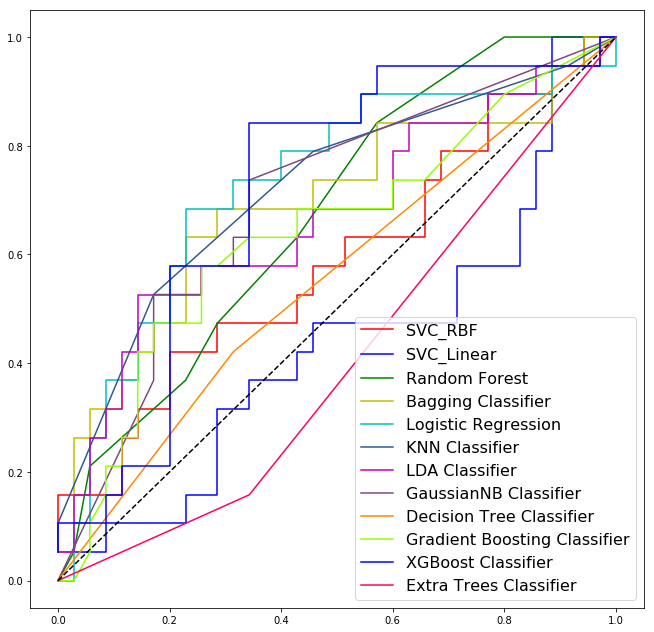

In [101]:
plt.figure(figsize=(11,11))
plt.plot(fpr_svc_krbf,tpr_svc_krbf,'r',label='SVC_RBF')
plt.plot(fpr_svckl,tpr_svckl,'b',label='SVC_Linear')
plt.plot(fpr_rnd,tpr_rnd,'g',label='Random Forest')
plt.plot(fpr_bag,tpr_bag,'y',label='Bagging Classifier')
plt.plot(fpr_log,tpr_log,'c',label='Logistic Regression')
plt.plot(fpr_knn,tpr_knn,'#305796',label='KNN Classifier')
plt.plot(fpr_lda,tpr_lda,'m',label='LDA Classifier')
plt.plot(fpr_gnb,tpr_gnb,'#7c497c',label='GaussianNB Classifier')
plt.plot(fpr_dct,tpr_dct,'#ff8800',label='Decision Tree Classifier')
plt.plot(fpr_gbm,tpr_gbm,'#94ff00',label='Gradient Boosting Classifier')
plt.plot(fpr_xg,tpr_xg,'b',label='XGBoost Classifier')
plt.plot(fpr_ext,tpr_ext,'#ff0061',label='Extra Trees Classifier')
plt.plot([0,1],[0,1],'k--')
plt.legend(loc='lower right',fontsize=16)
plt.show()